# Oh, To Be Young Again

In this example, we are going to compare hot stars (that have very short main sequence lifetimes) to general field stars within 1 kpc from the Sun. First let's download our two samples from Gaia

In [1]:
from astroquery.gaia import Gaia

gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
job = Gaia.launch_job_async("SELECT TOP 10000 ra, dec, parallax, pmra, pmdec, radial_velocity, bp_rp, phot_g_mean_mag "
                            "FROM gaiadr3.gaia_source AS g3 "
                            "WHERE parallax_over_error > 10 AND parallax > 1 AND radial_velocity IS NOT NULL "
                            "AND bp_rp < 0 AND phot_g_mean_mag + 5 * LOG10(0.001 * parallax) + 5 < 1 "
                            "AND ABS(4.74 * pm / parallax) < 200")
hot_stars = job.get_results()

gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
job = Gaia.launch_job_async("SELECT TOP 10000 ra, dec, parallax, pmra, pmdec, radial_velocity, bp_rp, phot_g_mean_mag "
                            "FROM gaiadr3.gaia_source AS g3 "
                            "WHERE parallax_over_error > 10 AND parallax > 1 AND radial_velocity IS NOT NULL "
                            "AND ABS(4.74 * pm / parallax) < 200")
field_stars = job.get_results()

Retrieving table 'gaiadr3.gaia_source'
INFO: Query finished. [astroquery.utils.tap.core]
Retrieving table 'gaiadr3.gaia_source'
INFO: Query finished. [astroquery.utils.tap.core]


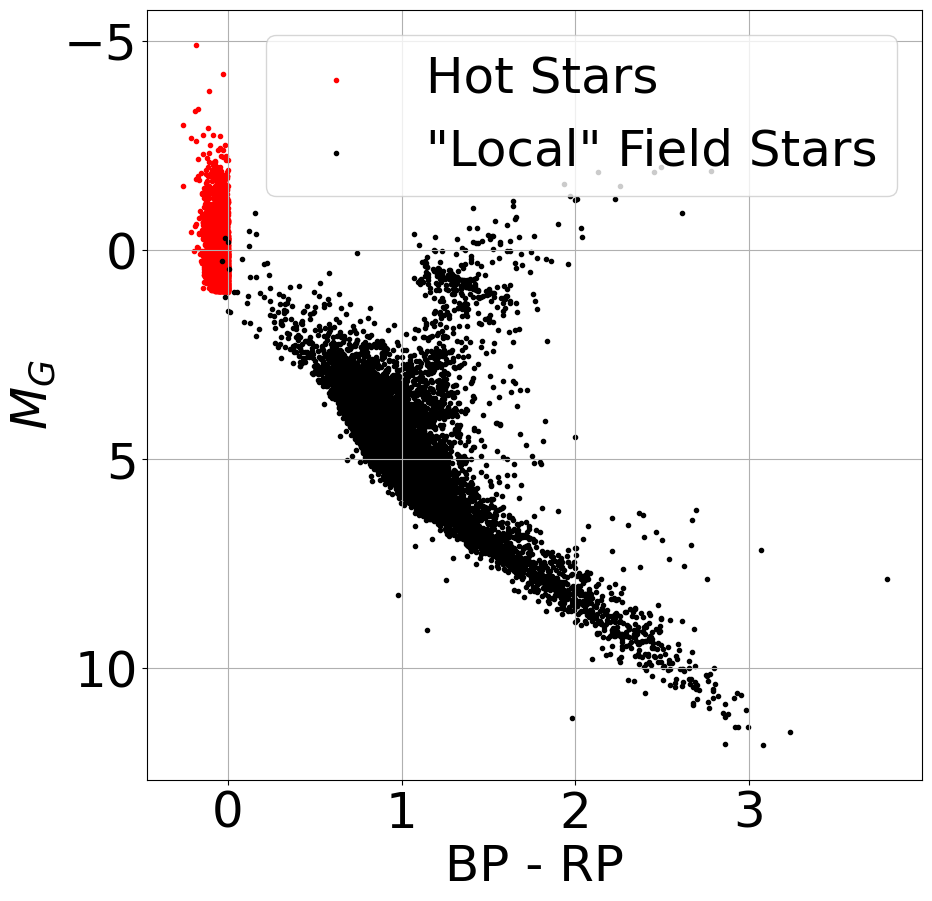

In [2]:
from galpy.potential import MWPotential2014
from galpy.orbit import Orbit
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.scatter(hot_stars['bp_rp'],
            hot_stars['phot_g_mean_mag'] + 5 * np.log10(0.001 * hot_stars['parallax']) + 5, c='r', marker='.',
            label='Hot Stars')
plt.scatter(field_stars['bp_rp'],
            field_stars['phot_g_mean_mag'] + 5 * np.log10(0.001 * field_stars['parallax']) + 5, c='k', marker='.',
            label='"Local" Field Stars')
plt.grid()
plt.legend()
plt.gca().invert_yaxis()
plt.xlabel('BP - RP')
plt.ylabel(r'$M_G$')
plt.show()

Now let's load all of the data into `galpy`!

In [3]:
# create sky coordinate
c = SkyCoord(ra=hot_stars['ra'],
             dec=hot_stars['dec'],
             distance=(1000 / hot_stars['parallax']) * u.pc,
             pm_ra_cosdec=hot_stars['pmra'],
             pm_dec=hot_stars['pmdec'],
             radial_velocity=hot_stars['radial_velocity'])

o_hot_stars = Orbit(c, ro=8, vo=220)

# create sky coordinate
c = SkyCoord(ra=field_stars['ra'],
             dec=field_stars['dec'],
             distance=(1000 / field_stars['parallax']) * u.pc,
             pm_ra_cosdec=field_stars['pmra'],
             pm_dec=field_stars['pmdec'],
             radial_velocity=field_stars['radial_velocity'])

o_field_stars = Orbit(c, ro=8, vo=220)

Now go ahead and let's integrate these orbits 500 Myr forward!

In [4]:
# add code here!

# HINT integrate orbits like this
# ts = np.linspace(0, 0.5, 10) * u.Gyr
# o.integrate(ts, MWPotential2014, method='dop853_c')




Once you integrate these orbits, compare the spatial distribution of these two classes of stars. Make sure to look in every spatial dimension! What differences do you see?

In [6]:
# add code here!



Now look at the kinemtics at $t = 0 $ for these two classes of stars. What differences do you see? How does this connect to the difference in spatial distribution you see?

In [10]:
# add code here!

# HINT Toomre diagram?


Discuss the reasons why we are seeing these differences for these two classes of stars.